In [1]:
# importing libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import numpy as np
import pandas as pd

In [2]:
# reading dataset (json file)
data=pd.read_json("Cell_Phones_and_Accessories.json")

In [3]:
data.head()

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
2,5,True,"04 21, 2013",B008DC8N5G,None,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,None,None
3,3,True,"02 27, 2013",B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,1361923200,3,None
4,4,True,"12 19, 2013",B00AKZWGAC,None,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,None,None


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760450 entries, 0 to 760449
Data columns (total 11 columns):
Rating              760450 non-null int64
Rev_verify          760450 non-null bool
Review_Date         760450 non-null object
IC                  760450 non-null object
Prod_meta           407826 non-null object
Reviewer_Name       760359 non-null object
Review              759920 non-null object
Rev_summ            760095 non-null object
Review_timestamp    760450 non-null int64
Useful              62200 non-null object
Prod_img            18194 non-null object
dtypes: bool(1), int64(2), object(8)
memory usage: 64.5+ MB


In [5]:
data.describe()

,Rating,Review_timestamp
count,760450.000000,7.604500e+05
mean,4.221357,1.440417e+09
std,1.232186,4.563251e+07
min,1.000000,1.035331e+09
25%,4.000000,1.416355e+09
50%,5.000000,1.444349e+09
75%,5.000000,1.470442e+09
max,5.000000,1.538438e+09


In [6]:
# checking the shape
data.shape

(760450, 11)

In [7]:
# dropping some irrelevant columns from the dataset
data.drop(['Review_timestamp','Reviewer_Name','Prod_img'],inplace=True,axis=1)

In [8]:
data.head()

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Review,Rev_summ,Useful
0,5,True,"09 1, 2015",B009XD5TPQ,None,Bought it for my husband. He's very happy with it,He's very happy with,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Great screen protector. Doesn't even seem as ...,Five Stars,None
2,5,True,"04 21, 2013",B008DC8N5G,None,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,None
3,3,True,"02 27, 2013",B0089CH3TM,{'Color:': ' Green'},"The material and fit is very nice, but the col...",Good case overall,3
4,4,True,"12 19, 2013",B00AKZWGAC,None,This last me about 3 days till i have to charg...,Awesome Battery,None


In [9]:
# converting review_date to datetime form for some time analysis
data['Review_Date']=pd.to_datetime(data['Review_Date'])

In [10]:
# making a month coloum
data['Review_month']=data['Review_Date'].dt.month

In [11]:
data['Rating'].unique()
# ratings are from 1 to 5

array([5, 3, 4, 1, 2], dtype=int64)

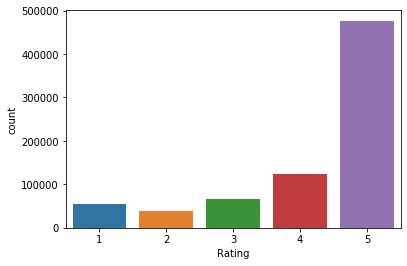

In [12]:
sns.countplot(data['Rating'])
# mostly reviews are very good (5)

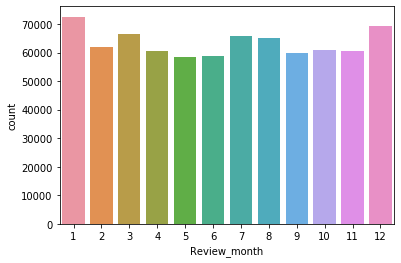

In [13]:
sns.countplot(data['Review_month'])
# in the first month, mostly reviews are done

In [14]:
data['Review_year']=data['Review_Date'].dt.year
data['Review_year'].nunique()
# 17 years

17

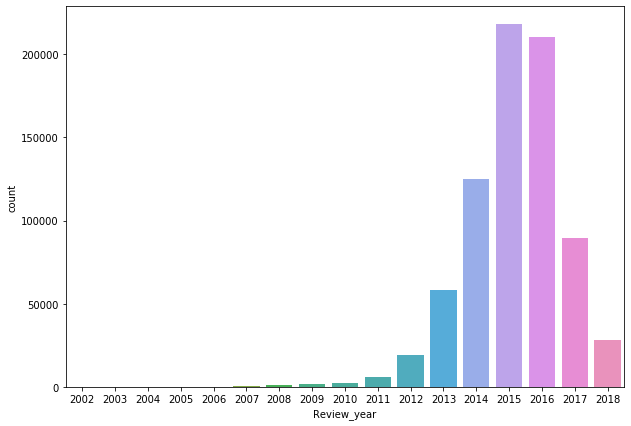

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(data['Review_year'])
# 2015 and 2016 are the years where mostly reviews are posted

In [16]:
print('data(IC) unique counts are ',data['IC'].nunique())
print('\n')
print(data['IC'].value_counts())

## total Item are 48134

data(IC) unique counts are  48134


B00VH88CJ0    1127
B005NF5NTK    1106
B019PV2I3G    1033
B00X5RV14Y    1018
B00P7N0320    1011
              ... 
B0091MI0AU       1
B00BI6WJZ4       1
B005LXHJMS       1
B00KG4CYMC       1
B00KHBQFZG       1
Name: IC, Length: 48134, dtype: int64


Rating               0
Rev_verify           0
Review_Date          0
IC                   0
Prod_meta       352624
Review             530
Rev_summ           355
Useful          698250
Review_month         0
Review_year          0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


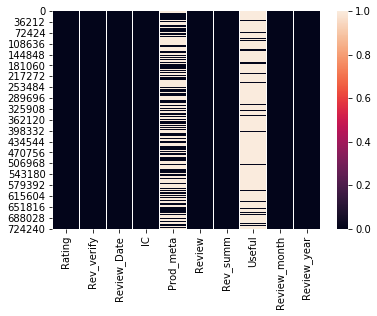

In [17]:
# checking null values
print(data.isnull().sum())
print(sns.heatmap(data.isnull()))

                Rating  Rev_verify  Review_month  Review_year
Rating        1.000000   -0.032027     -0.008038     0.037055
Rev_verify   -0.032027    1.000000     -0.023987     0.074595
Review_month -0.008038   -0.023987      1.000000    -0.211917
Review_year   0.037055    0.074595     -0.211917     1.000000
AxesSubplot(0.125,0.125;0.62x0.755)


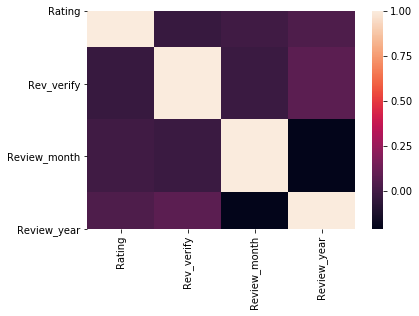

In [18]:
# checking the correleation in the dataset 
print(data.corr())
print(sns.heatmap(data.corr()))

In [19]:
# again drooping some columns from the dataset which are of no use anymore
data.drop(['Prod_meta','Useful'],inplace=True,axis=1)

In [20]:
data.head()

,Rating,Rev_verify,Review_Date,IC,Review,Rev_summ,Review_month,Review_year
0,5,True,2015-09-01,B009XD5TPQ,Bought it for my husband. He's very happy with it,He's very happy with,9,2015
1,5,True,2016-01-09,B016MF3P3K,Great screen protector. Doesn't even seem as ...,Five Stars,1,2016
2,5,True,2013-04-21,B008DC8N5G,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,4,2013
3,3,True,2013-02-27,B0089CH3TM,"The material and fit is very nice, but the col...",Good case overall,2,2013
4,4,True,2013-12-19,B00AKZWGAC,This last me about 3 days till i have to charg...,Awesome Battery,12,2013


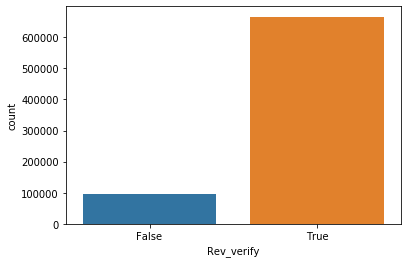

In [21]:
# mostly verified reviews are there 
sns.countplot(data['Rev_verify'])

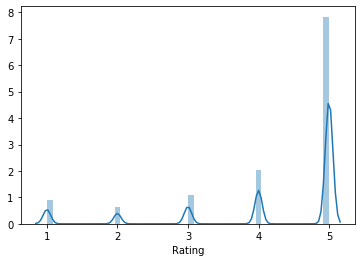

In [22]:
# 5 star rating mostly given to the items
sns.distplot(data['Rating'])

In [23]:
# now checking the null values from the columns we are left with
data.isnull().sum()

Rating            0
Rev_verify        0
Review_Date       0
IC                0
Review          530
Rev_summ        355
Review_month      0
Review_year       0
dtype: int64

In [24]:
# let us see which is the mostly reviewd comment done by the customers to the product
print(data['Review'].mode())

0    good
dtype: object


In [25]:
# drooping the rows where the null or nan values are present
# drooping the rows won't effect the model much in terms of any trainnig because of large size of the dataset 
data.dropna(axis=0,inplace=True)

In [26]:
# checking the shape we are left with 
data.shape

(759602, 8)

In [27]:
# we only need the reviews for the output (we need to extract the keywords from the reviews only) 
df=data[['IC','Review']]

In [28]:
df.head()

,IC,Review
0,B009XD5TPQ,Bought it for my husband. He's very happy with it
1,B016MF3P3K,Great screen protector. Doesn't even seem as ...
2,B008DC8N5G,Saved me lots of money! it's not gorilla glass...
3,B0089CH3TM,"The material and fit is very nice, but the col..."
4,B00AKZWGAC,This last me about 3 days till i have to charg...


In [29]:
# grouping the reviews by the item code in a single row so as to sort the features
# by .agg(lambda x: ' '.join(x)) all the reviews will get joined  in a single row
df=df['Review'].groupby(by=data['IC']).agg(lambda x: ' '.join(x))

In [30]:
# converting it into a dataframe and reset the index
df=pd.DataFrame(df)
df.reset_index(level=0, inplace=True)
df.head()

,IC,Review
0,7508492919,It is such a good case for a low price. I have...
1,7532385086,I was very excited when I first got this case....
2,7887421268,Good item Received this in about a weeks time....
3,8199900164,thank you. Works some of the time. The charge...
4,8288853439,Great ! So far.\nI had this charger before and...


In [31]:
df.tail()

,IC,Review
48128,B01HJBS5C2,"Strong, protective but slim and light. I am al..."
48129,B01HJC7N4C,my sons likes it. For the price it isn't too b...
48130,B01HJCN1UC,great thanks good cable. just be sure to know ...
48131,B01HJCN55I,Received the cable in two days and it's the be...
48132,B01HJH9IN6,Just received it and it's VERY thin. No need t...


In [32]:
# now making another  dataframe containg the unique item code and the maximum rating given by any user to that item 
data_max=data[['IC','Rating']]

# grouping the IC with max rating to that item
data_max=data_max['Rating'].groupby(by=data_max['IC']).max()

# making into a dataframe and reset index
data_max=pd.DataFrame(data_max)
data_max.reset_index(level=0, inplace=True)
data_max.head(10)

,IC,Rating
0,7508492919,5
1,7532385086,5
2,7887421268,5
3,8199900164,5
4,8288853439,5
5,8288862993,5
6,828886922X,5
7,8288878881,5
8,9578085451,5
9,961301375X,5


In [33]:
# now making another  dataframe containg the unique item code and the minimum rating given by any user to that item 
data_min=data[['IC','Rating']]

# grouping the IC with min rating to that item
data_min=data_min['Rating'].groupby(by=data_min['IC']).min()

# making into a dataframe and reset index
data_min=pd.DataFrame(data_min)
data_min.reset_index(level=0, inplace=True)
data_min.head(10)

,IC,Rating
0,7508492919,1
1,7532385086,1
2,7887421268,1
3,8199900164,2
4,8288853439,1
5,8288862993,1
6,828886922X,3
7,8288878881,1
8,9578085451,3
9,961301375X,1


In [34]:
# now making another  dataframe containg the unique item code and the mean/average rating given by any user to that item 
data_mean=data[['IC','Rating']]

# grouping the IC with mean rating to that item
data_mean=data_mean['Rating'].groupby(by=data_mean['IC']).mean()
data_mean=pd.DataFrame(data_mean)

# making into a dataframe and reset index
data_mean.reset_index(level=0, inplace=True)
data_mean.head(10)

,IC,Rating
0,7508492919,4.300000
1,7532385086,3.285714
2,7887421268,3.538462
3,8199900164,3.750000
4,8288853439,3.818182
5,8288862993,3.656250
6,828886922X,4.333333
7,8288878881,3.977273
8,9578085451,4.250000
9,961301375X,3.923077


In [35]:
# now merging all the maximum rating (from data_max), min rating(data_min) , average rating(data_mean) and all reviews to that IC
# into a single dataframe "" df ""

df['maximum_rating']=data_max['Rating']
df['minimum_rating']=data_min['Rating']
df['average_rating']=data_mean['Rating']

In [36]:
df.head()

,IC,Review,maximum_rating,minimum_rating,average_rating
0,7508492919,It is such a good case for a low price. I have...,5,1,4.300000
1,7532385086,I was very excited when I first got this case....,5,1,3.285714
2,7887421268,Good item Received this in about a weeks time....,5,1,3.538462
3,8199900164,thank you. Works some of the time. The charge...,5,2,3.750000
4,8288853439,Great ! So far.\nI had this charger before and...,5,1,3.818182


In [39]:
# cleaning the review coloumn:
# lemmatizing, splitting, removing stopwords , punctutation and taking most occuring words (>3)

# defining a function for all that process
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
stemmer=SnowballStemmer('english')
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
            result.append(lemmatize_stemming(token))
            
    return result

In [41]:
# applying the function to the review column and saving in into a new column as review_cleaned :

df['review_cleaned']=df['Review'].apply(preprocess)

In [42]:
df.head()

,IC,Review,maximum_rating,minimum_rating,average_rating,review_cleaned
0,7508492919,It is such a good case for a low price. I have...,5,1,4.300000,"[good, case, price, right, problem, lose, ston..."
1,7532385086,I was very excited when I first got this case....,5,1,3.285714,"[excit, case, love, color, feel, start, notic,..."
2,7887421268,Good item Received this in about a weeks time....,5,1,3.538462,"[good, item, receiv, week, time, nice, actual,..."
3,8199900164,thank you. Works some of the time. The charge...,5,2,3.750000,"[thank, work, time, charger, stop, work, day, ..."
4,8288853439,Great ! So far.\nI had this charger before and...,5,1,3.818182,"[great, charger, pretti, good, year, fit, phon..."


In [43]:
## function for finding the keywords from all the reviws of a particular item 


import nltk
def freq_words(text, terms = 18):
  # prepare a dictionary of word-frequency pairs
    fdist = nltk.FreqDist(text)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    d = words_df.nlargest(columns="count", n = terms)
    frequent_words=[]
    for word in d['word']:
        frequent_words.append(word)
    return frequent_words


In [44]:
# let us analyze the review column i.e all ther review of the first item code 
df['Review'][0]

'It is such a good case for a low price. I have it on right now and never had any problems with it besides losing about 2 stones since my purchase because I\'m rough with it. I recommend it. I didn\'t get the same case that\'s shown in the picture. The case I got had a black and gold bow. Its still cute but not what I wanted. I wanted what was in the picture. My teenage daughter LOVED this case.  It is really pretty.\n\nI only put 4 stars because it does look a little cheap looking, but what do you expect with this much bling. ;o) When you don\'t want to spend a whole lot of cash but want a great deal...this is the shop to buy from! I liked it because it was cute, but the studs fall off easily and to protect a phone this would not be recommended. Buy if you just like it for looks. It\'s very cute and the stones lasted a long time!  It really makes your phone look a lot more prettier and funnier. the hirl that wants and needs Hello Kitty products\nWas so happy that she has a collection 

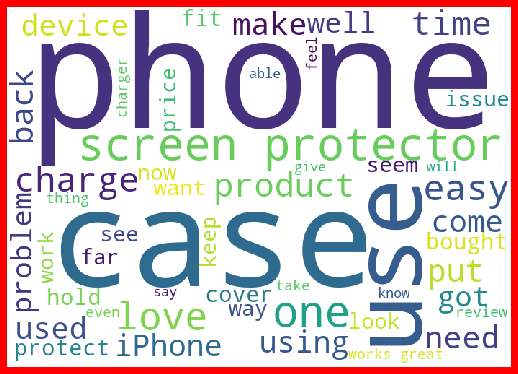

In [51]:

#Getting sense of loud words before cleaning of the review column
from wordcloud import WordCloud


review = df['Review']

review_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(review))

plt.figure(figsize=(7,7),facecolor='r')
plt.imshow(review_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [53]:
# let us analyze the review column after cleaned  i.e all ther review of the first item code 
df['review_cleaned'][0]

['good',
 'case',
 'price',
 'right',
 'problem',
 'lose',
 'stone',
 'purchas',
 'rough',
 'recommend',
 'case',
 'show',
 'pictur',
 'case',
 'black',
 'gold',
 'cute',
 'want',
 'want',
 'pictur',
 'teenag',
 'daughter',
 'love',
 'case',
 'pretti',
 'star',
 'look',
 'littl',
 'cheap',
 'look',
 'expect',
 'bling',
 'want',
 'spend',
 'cash',
 'want',
 'great',
 'deal',
 'shop',
 'like',
 'cute',
 'stud',
 'fall',
 'easili',
 'protect',
 'phone',
 'recommend',
 'like',
 'look',
 'cute',
 'stone',
 'last',
 'long',
 'time',
 'make',
 'phone',
 'look',
 'prettier',
 'funnier',
 'hirl',
 'want',
 'need',
 'hello',
 'kitti',
 'product',
 'happi',
 'collect',
 'choos',
 'friend',
 'want',
 'hello',
 'kitti',
 'phone',
 'case',
 'thank',
 'seller',
 'cute',
 'love',
 'drop',
 'drop',
 'iton',
 'bathroom',
 'floor',
 'crack',
 'item',
 'cute',
 'case',
 'cute',
 'look',
 'good',
 'white',
 'iphon',
 'pretti',
 'good',
 'qualiti',
 'diamond',
 'fall',
 'drop',
 'cement',
 'kinda',
 'hard',

In [52]:
# let us see an example for that before implenting it into the whole dataframe column
freq_words(df['review_cleaned'][1])

# working perfectly fine :

['phone',
 'case',
 'cover',
 'feel',
 'rubber',
 'look',
 'like',
 'receiv',
 'recommend',
 'want',
 'good',
 'product',
 'refund',
 'excit',
 'love',
 'color',
 'start',
 'notic']

In [54]:
# applying over the review_cleaned and saving as new column called as keyword column (having Review summary keywords 
#extracted for each product)

df['Keywords']=df['review_cleaned'].apply(freq_words)

In [58]:
#Printing first 5 summary keywords  results to check.
for keyword in df['Keywords'][:5]:
    print(keyword)
    

['case', 'cute', 'phone', 'look', 'love', 'pretti', 'like', 'come', 'happi', 'want', 'great', 'fall', 'time', 'iphon', 'compliment', 'good', 'stone', 'recommend']
['phone', 'case', 'cover', 'feel', 'rubber', 'look', 'like', 'receiv', 'recommend', 'want', 'good', 'product', 'refund', 'excit', 'love', 'color', 'start', 'notic']
['case', 'phone', 'good', 'product', 'protect', 'nice', 'look', 'great', 'receiv', 'price', 'spot', 'want', 'chang', 'fast', 'ship', 'peel', 'miss', 'deal']
['work', 'phone', 'thank', 'time', 'charger', 'stop', 'day', 'seeem', 'okay', 'mind', 'buy', 'beep', 'doesnt', 'charg', 'awesom']
['charger', 'galaxi', 'charg', 'phone', 'great', 'say', 'blackberri', 'work', 'fast', 'price', 'samsung', 'like', 'pretti', 'good', 'right', 'go', 'loos', 'plus']


In [59]:
df.head()

,IC,Review,maximum_rating,minimum_rating,average_rating,review_cleaned,Keywords
0,7508492919,It is such a good case for a low price. I have...,5,1,4.300000,"[good, case, price, right, problem, lose, ston...","[case, cute, phone, look, love, pretti, like, ..."
1,7532385086,I was very excited when I first got this case....,5,1,3.285714,"[excit, case, love, color, feel, start, notic,...","[phone, case, cover, feel, rubber, look, like,..."
2,7887421268,Good item Received this in about a weeks time....,5,1,3.538462,"[good, item, receiv, week, time, nice, actual,...","[case, phone, good, product, protect, nice, lo..."
3,8199900164,thank you. Works some of the time. The charge...,5,2,3.750000,"[thank, work, time, charger, stop, work, day, ...","[work, phone, thank, time, charger, stop, day,..."
4,8288853439,Great ! So far.\nI had this charger before and...,5,1,3.818182,"[great, charger, pretti, good, year, fit, phon...","[charger, galaxi, charg, phone, great, say, bl..."


In [60]:
# finally we are having a dataset containg :
#  ==> minimum rating given by the users
#  ==> all the reviews done by the buyers/users to that unique ic
#  ==> maximum rating given by the users 
#  ==> minimum rating given by the users
#  ==> average rating given by the users
#  ==> cleaned reviews (no stopwords,punctuation # only important key words)
#  ==> Review summary keywords extracted for each product

In [61]:
# saving the dataframe  into the JSON file :

df.to_json('product_review_summarization_.json')

In [62]:
#
with open('C:/Users/prince/product_review_summarization_.json') as f:
    review=pd.read_json(f)

In [65]:
review.head(4)

,IC,Review,maximum_rating,minimum_rating,average_rating,review_cleaned,Keywords
0,7508492919,It is such a good case for a low price. I have...,5,1,4.300000,"[good, case, price, right, problem, lose, ston...","[case, cute, phone, look, love, pretti, like, ..."
1,7532385086,I was very excited when I first got this case....,5,1,3.285714,"[excit, case, love, color, feel, start, notic,...","[phone, case, cover, feel, rubber, look, like,..."
2,7887421268,Good item Received this in about a weeks time....,5,1,3.538462,"[good, item, receiv, week, time, nice, actual,...","[case, phone, good, product, protect, nice, lo..."
3,8199900164,thank you. Works some of the time. The charge...,5,2,3.750000,"[thank, work, time, charger, stop, work, day, ...","[work, phone, thank, time, charger, stop, day,..."
